In [4]:
# Codice per clonare la repository di github con tutti i dati. Va eseguito una sola volta
# (per questo si controlla se la cartella esista già o meno)
# È stato scelto questo metodo per permettere a tutti, sia da google colab che in locale,
# di avere i dati a disposizione

# Se si esegue in locale, assicurarsi di avere git installato
# Al link della repository sono visionabili tutti i file
from os import path
if not path.exists("Laboratorio_Fisica_3"):
    !git clone https://github.com/MasterRoby3/Laboratorio_Fisica_3

# Per comodità si definisce una variabile che sia la radice di tutti i percorsi utilizzati, in modo da alleggerire il codice successivo
rad = "Laboratorio_Fisica_3/Lenti/"

# In questa prima cella si importano anche le librerie necessarie:
import numpy as np
from scipy import optimize as sop
from scipy import constants as scc
import matplotlib.pyplot as plt
import pandas as pd

#Altri dati utili per i plot
titlefontsize, labelfontsize, tickfontsize=20, 16, 14
markersize, linewidth = 6, 1

# Lenti: uso, focalizzazione e collimazione
Obiettivo di quest'esperienza è familiarizzare con l'utilizzo delle lenti, imparando come manipolare e propagare un fascio luminoso. L'apparato sperimentale è costituito da:
* LED verde, alimentato in onda quadra per distinguere il segnale dalla luce ambientale (interessa la parte variabile, la luce ambientale contribuisce con un offset fisso)
* Fotodiodo, collegato alla scatoletta a batterie che garantisce la risposta lineare (la scatoletta nera, polarizzandolo inversamente, linearizza la risposta)
* Oscilloscopio, per effettuare le misure di tensione sul fotodiodo
* Lenti e supporti

Dato che lo schema di detezione (scatoletta nera) rende la risposta lineare, si ha $V \propto I$, dove con I si intende l'intensità. Nelle parti successive, quando ci si riferirà all'intensità, si parlerà in realtà di dati in tensione, essendo in tensione le misure effettuate con l'oscilloscopio.

## Parte 1: Intensità in funzione della distanza
In questa parte dell'esperienza non viene fatto uso di lenti, viene semplicemente misurato il segnale al variare della distanza tra led e fotodiodo. L'intensità, misurata al variare della distanza led - fotodiodo, è data dalla funzione:
$$I(x) = \frac{A}{(x + x_0)^2}$$
$x_0$ è un offset sulla misura della distanza, necessario perché non siamo nel caso di una sorgente ideale puntiforme, quindi ci sarà sempre un offset dal punto in cui si misura.

Si vuole quindi effettuare un fit a due parametri, $A$ e $x_0$; di seguito le celle con la lettura dati e i plot.

In [6]:
# Lettura dati da csv
data = pd.read_csv(rad + "data/no_lents.csv")

print("Dataframe da csv: ")
print(data)
headers = data.keys()

# Creo gli array numpy per l'analisi successiva
x = data['x'].to_numpy()
V = data['V'].to_numpy()

Dataframe da csv: 
       x       V
0    2.4  160.00
1    3.0  122.00
2    4.0   82.00
3    5.0   58.40
4    6.0   46.40
5    7.0   36.00
6    8.0   28.80
7    9.0   22.80
8   10.0   18.80
9   11.0   15.60
10  12.0   13.20
11  13.0   11.40
12  14.0   10.00
13  15.0    8.80
14  16.0    7.80
15  17.0    7.00
16  18.0    6.40
17  19.0    5.80
18  20.0    5.20
19  21.0    4.80
20  22.0    4.24


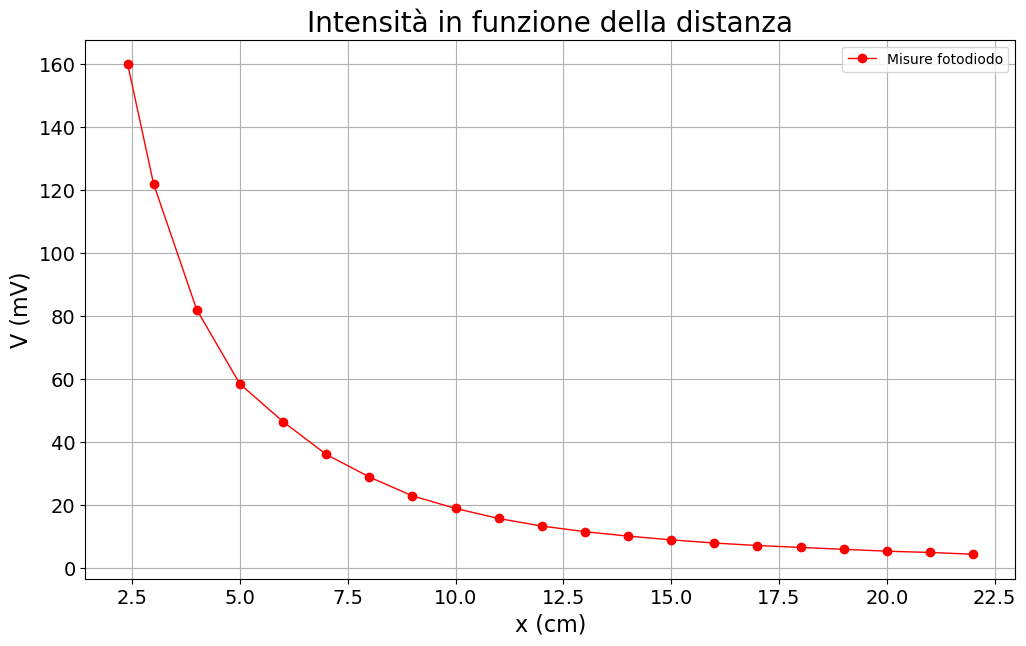

In [17]:
# In questa cella si procede al plot dei dati
fig, ax = plt.subplots(1, 1, figsize=[12,7])

ax.set_title('Intensità in funzione della distanza', size=titlefontsize)
ax.plot(x, V, '-o', markersize=markersize, linewidth=linewidth, color='red', label="Misure fotodiodo")
ax.set_xlabel('x (cm)', size=labelfontsize)
ax.set_ylabel('V (mV)', size=labelfontsize)
ax.tick_params(labelsize=tickfontsize)
ax.grid(True)
ax.legend();

In [46]:
# Qui si definiscono le funzioni utili per il fit
def intens_distanza(x, x_0, A):
    return A / (x + x_0)**2

# Funzione utile per il calcolo dell'R^2
def r_squared(actual, predicted):
    residuals = actual - predicted
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum( (actual - np.mean(actual))**2 )
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

In [47]:
# Cella per il fit dei dati
# Definizione dei bounds
x_0_min, x_0_max = 0, 5
A_min, A_max = 0, 5000
min, max = [x_0_min, A_min], [x_0_max, A_max]
bounds = [min, max]
ndata = len(x)          #numero di dati analizzati

# Si effettua ora il fit non lineare per i parametri x_0 e A
popt, pcov = sop.curve_fit(intens_distanza, x, V, bounds=bounds)
x_0 = popt[0]
A = popt[1]
# Si calcola la deviazione standard
sigma = np.sqrt(ndata*np.diag(pcov))
r_sq = r_squared(V, intens_distanza(x, x_0, A))

print('Valore fittato per x_0=', "{:.3g}".format(x_0), 'cm deviazione standard=',"{:.3g}".format(sigma[0]), 'cm')
print('Valore fittato per A=', "{:.3g}".format(A), 'mV/cm^2 deviazione standard=',"{:.3g}".format(sigma[1]), 'mV/cm^2')
print("R^2 = ", "{:.5g}".format(r_sq))

Valore fittato per x_0= 1.63 cm deviazione standard= 0.145 cm
Valore fittato per A= 2.6e+03 mV/cm^2 deviazione standard= 163 mV/cm^2
R^2 =  0.99973


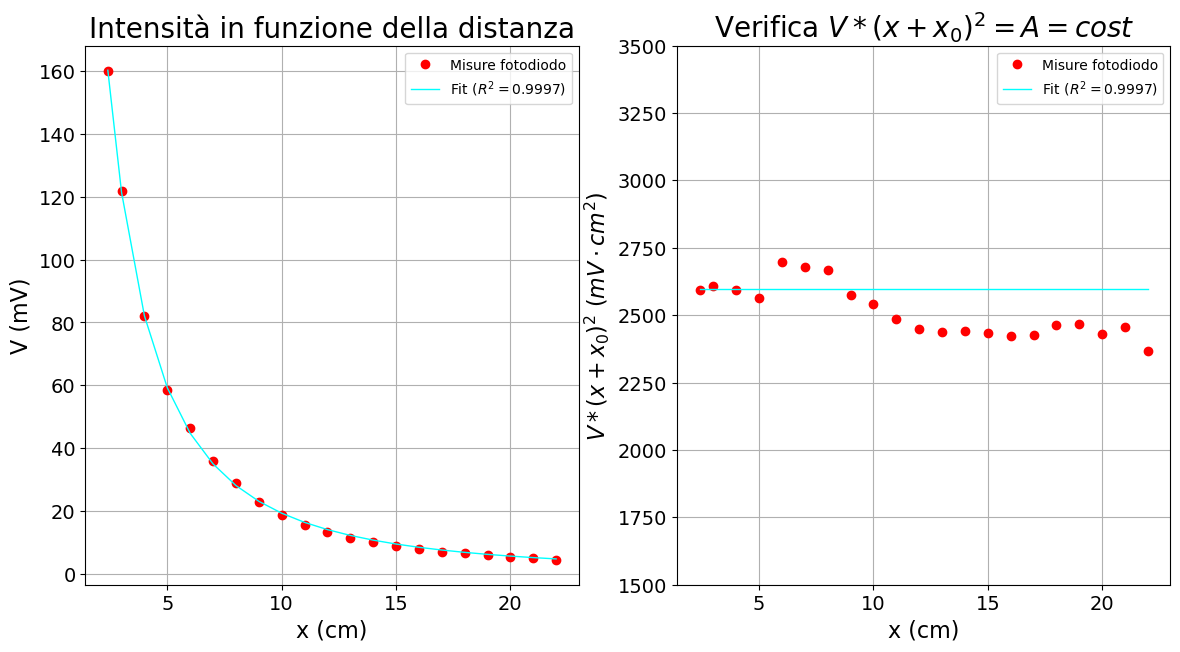

In [62]:
# In questa cella si procede al plot dei dati col fit
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[14,7])

ax1.set_title('Intensità in funzione della distanza', size=titlefontsize)
ax1.plot(x, V, 'o', markersize=markersize, color='red', label="Misure fotodiodo")
ax1.plot(x, intens_distanza(x, x_0, A), linewidth=linewidth, color='cyan', label="Fit ($R^2=${:.4f})".format(r_sq))
ax1.set_xlabel('x (cm)', size=labelfontsize)
ax1.set_ylabel('V (mV)', size=labelfontsize)
ax1.tick_params(labelsize=tickfontsize)
ax1.grid(True)
ax1.legend();

ax2.set_title('Verifica $V * (x+x_0)^2 = A = cost$', size=titlefontsize)
ax2.plot(x, V * (x + x_0)**2, 'o', markersize=markersize, color='red', label="Misure fotodiodo")
ax2.plot(x, intens_distanza(x, x_0, A) * (x + x_0)**2, linewidth=linewidth, color='cyan', label="Fit ($R^2=${:.4f})".format(r_sq))
ax2.set_xlabel('x (cm)', size=labelfontsize)
ax2.set_ylabel('$V * (x+x_0)^2$ ($mV \cdot cm^2$)', size=labelfontsize)
ax2.set_ylim(1500, 3500)
ax2.tick_params(labelsize=tickfontsize)
ax2.grid(True)
ax2.legend();

## Parte 2: legge delle lenti sottili
In questa parte dell'esperimento si introduce una lente tra il led e il fotodiodo (di seguito un'immagine con lo schema, presa dalle slide di laboratorio).

<br><center><img src="Laboratorio_Fisica_3/Lenti/img/1lente.png" width="750"/></center><br>

Lo scopo di questa parte è verificare la legge delle lenti sottili:
$$\frac{1}{f} = \frac{1}{x+x_0} + \frac{1}{y+y_0}$$
dove:
* $f$ è la distanza focale
* $x$ è la distanza LED-lente (con offset $x_0$)
* $y$ è la distanza lente-fotodiodo (con offset $y_0$)

Si procede fissando $x$ e misurando l'intensità in funzione di $y$. Così facendo si ottengono degli andamenti del tipo seguente (se ne riporta solo uno).

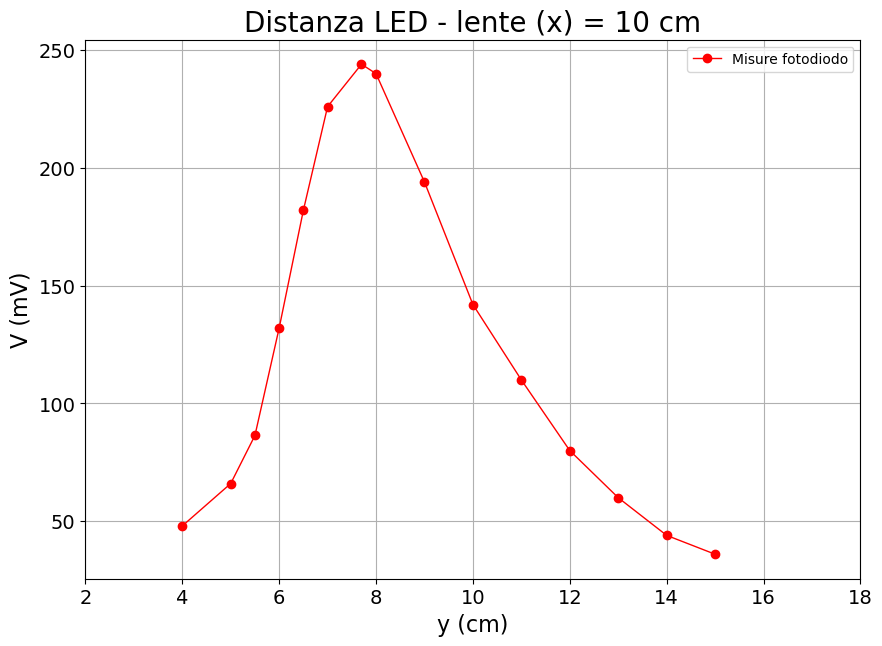

In [75]:
# Lettura dati da csv
data = pd.read_csv(rad + "data/1lent_10cm.csv")

headers = data.keys()

# Creo gli array numpy per l'analisi successiva
y = data['y'].to_numpy()
V = data['V'].to_numpy()

# In questa cella si procede al plot dei dati col fit
fig, ax = plt.subplots(1, 1, figsize=[10,7])

ax.set_title('Distanza LED - lente (x) = 10 cm', size=titlefontsize)
ax.plot(y, V, '-o', markersize=markersize, linewidth=linewidth, color='red', label="Misure fotodiodo")
ax.set_xlabel('y (cm)', size=labelfontsize)
ax.set_ylabel('V (mV)', size=labelfontsize)
ax.set_xlim(2, 18)
ax.tick_params(labelsize=tickfontsize)
ax.grid(True)
ax.legend();

Questo processo si ripete per varie distanze $x$, ricavando la $y$ a cui l'intensità è massima ($y_{max}$). Da questi dati si può effettuare il fit con la legge delle lenti sottili ottenendo la distanza focale ($f \approx$ 5 cm). Di seguito vengono riportati i dati, fatti i fit e i plot.

Valore fittato per x_0= 3.35 cm deviazione standard= 2.43 cm
Valore fittato per y_0= 1.76 cm deviazione standard= 1.55 cm
Valore fittato per f= 5.59 cm deviazione standard= 0.987 cm
R^2 =  0.99645


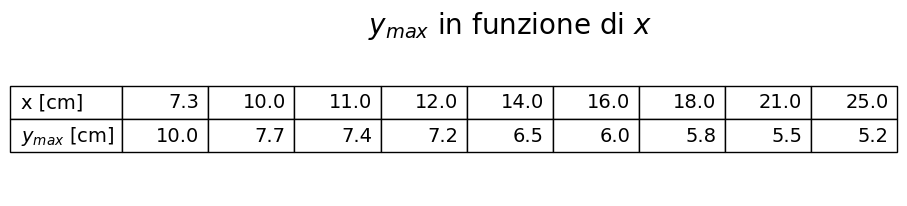

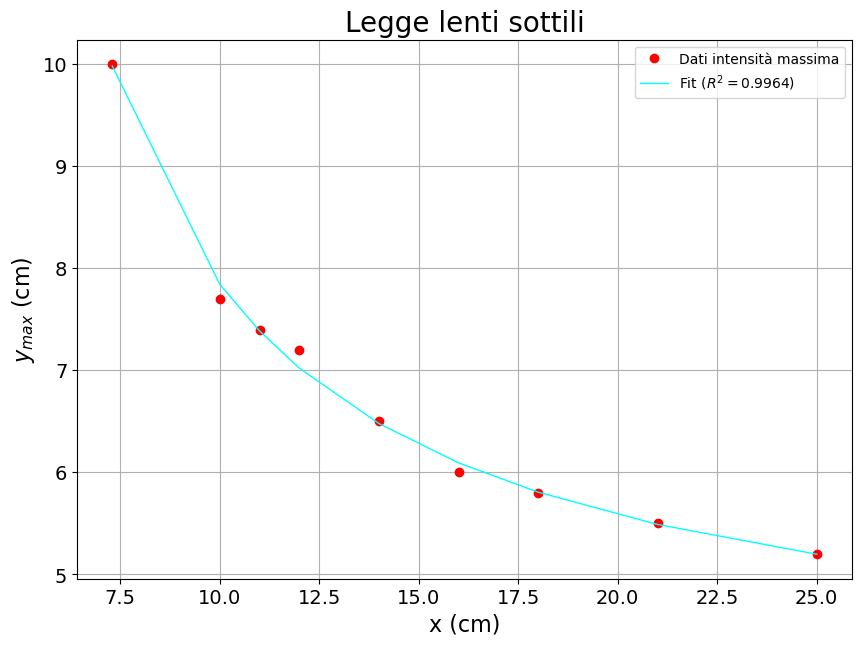

In [106]:
# Lettura dati da csv
data = pd.read_csv(rad + "data/1lent_ymax.csv")
headers = data.keys()

# Creo gli array numpy per l'analisi successiva
x = data['x'].to_numpy()
y_max = data['y_max'].to_numpy()

# Qui viene definita la funzione invertita y = (1/f - 1/(x - x_0))^-1 - y_0
def lenti_sottili(x, x_0, y_0, f):
    return 1/(1/f - 1/(x + x_0)) - y_0

# Cella per il fit dei dati
# Definizione dei bounds
x_0_min, x_0_max = 0, 5
y_0_min, y_0_max = 0, 5
f_min, f_max = 0, 10
min, max = [x_0_min, y_0_min, f_min], [x_0_max, y_0_max, f_max]
bounds = [min, max]
ndata = len(x)          #numero di dati analizzati

# Si effettua ora il fit non lineare per i parametri x_0 e A
popt, pcov = sop.curve_fit(lenti_sottili, x, y_max, [0,0,5], bounds=bounds)
x_0 = popt[0]
y_0 = popt[1]
f = popt[2]
# Si calcola la deviazione standard
sigma = np.sqrt(ndata*np.diag(pcov))
r_sq = r_squared(y_max, lenti_sottili(x, x_0, y_0, f))

# Stampo i dati fittati
print('Valore fittato per x_0=', "{:.3g}".format(x_0), 'cm deviazione standard=',"{:.3g}".format(sigma[0]), 'cm')
print('Valore fittato per y_0=', "{:.3g}".format(y_0), 'cm deviazione standard=',"{:.3g}".format(sigma[1]), 'cm')
print('Valore fittato per f=', "{:.3g}".format(f), 'cm deviazione standard=',"{:.3g}".format(sigma[2]), 'cm')
print("R^2 = ", "{:.5g}".format(r_sq))

# Tabella
figure = plt.figure(figsize=[10,2])
plt.title("$y_{max}$ in funzione di $x$", size=titlefontsize)
plt.axis('tight')
plt.axis('off')
rows = ["x [cm]", "$y_{max}$ [cm]"]
table = plt.table(cellText=[x, y_max], rowLabels=rows, loc='center')
table.set_fontsize(14)
table.scale(1, 2)

# Fit
fig, ax = plt.subplots(1, 1, figsize=[10,7])

ax.set_title('Legge lenti sottili', size=titlefontsize)
ax.plot(x, y_max, 'o', markersize=markersize, color='red', label="Dati intensità massima")
ax.plot(x, lenti_sottili(x, x_0, y_0, f), linewidth=linewidth, color='cyan', label="Fit ($R^2=${:.4f})".format(r_sq))
ax.set_xlabel('x (cm)', size=labelfontsize)
ax.set_ylabel('$y_{max}$ (cm)', size=labelfontsize)
ax.tick_params(labelsize=tickfontsize)
ax.grid(True)
ax.legend();

Il fit precedente può ritenersi soddisfacente, ottenendo $f = 5.59 \pm 0.987$ cm coerente con ciò che ci si aspettava $f \approx 5$ cm. Gli offset $x_0$ e $y_0$ hanno una deviazione standard abbastanza alta, ma ciò può essere imputabile al fatto che essendo un fit su 3 parametri, l'algoritmo non riesce a ottimizzarli entrambi allo stesso tempo (essendo entrambi termini di offset). Si è deciso di tenerli comunque come offset separati (non considerando $x_0 = y_0$) dato che così facendo il fit è risultato più accurato e stabile.

## Fase 3: fascio collimato
In questa ultima fase si è piazzata una seconda lente tra il led e il fotodiodo per collimare il fascio. Le lenti devono essere posizionate a una distanza circa pari alla distanza focale dal led e dal fotodiodo (schema nella figura seguente, presa dalle slide di laboratorio).

<br><center><img src="Laboratorio_Fisica_3/Lenti/img/2lenti.png" width="750"/></center><br>

Essendo il fascio collimato, quindi, l'intensità dovrebbe rimanere costante al variare della distanza lente - lente ($X$). Di seguito il grafico con i dati ottenuti.

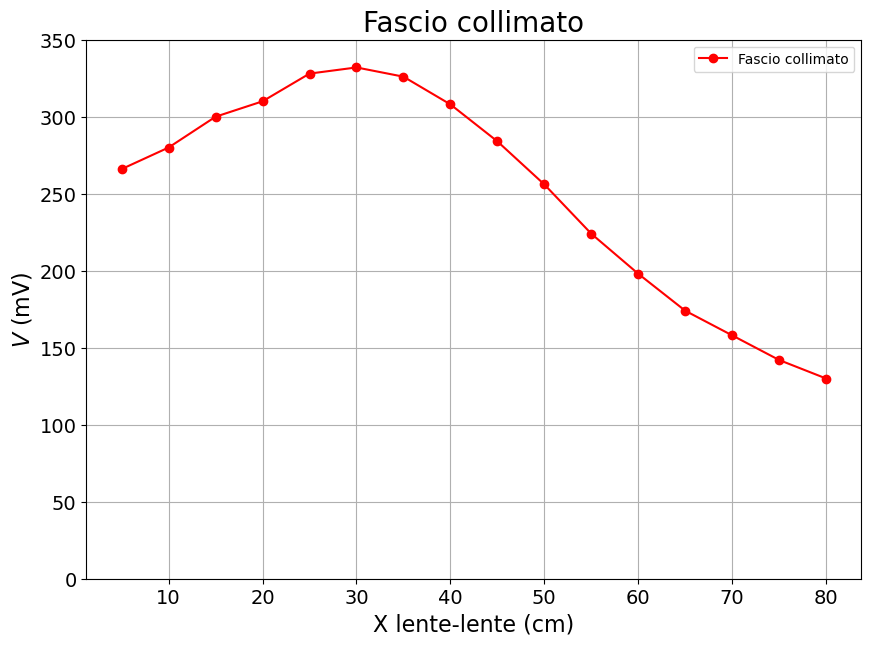

In [110]:
# Lettura dati da csv
data = pd.read_csv(rad + "data/2lens.csv")
headers = data.keys()

# Creo gli array numpy per l'analisi successiva
x_lens_lens = data['X'].to_numpy()
V = data['V'].to_numpy()

# Fit
fig, ax = plt.subplots(1, 1, figsize=[10,7])

ax.set_title('Fascio collimato', size=titlefontsize)
ax.plot(x_lens_lens, V, 'o-', markersize=markersize, color='red', label="Fascio collimato")
ax.set_xlabel('X lente-lente (cm)', size=labelfontsize)
ax.set_ylabel('$V$ (mV)', size=labelfontsize)
ax.set_ylim(0,350)
ax.tick_params(labelsize=tickfontsize)
ax.grid(True)
ax.legend();

Come si vede, la relazione non è precisissima. Per migliorare la collimazione e rendere l'andamento più simile a una costante, si può aggiungere un diaframma subito dopo il led, allo scopo di rendere la sorgente di luce approssimativamente puntiforme. Di seguito il grafico relativo ai dati presi con il diaframma.

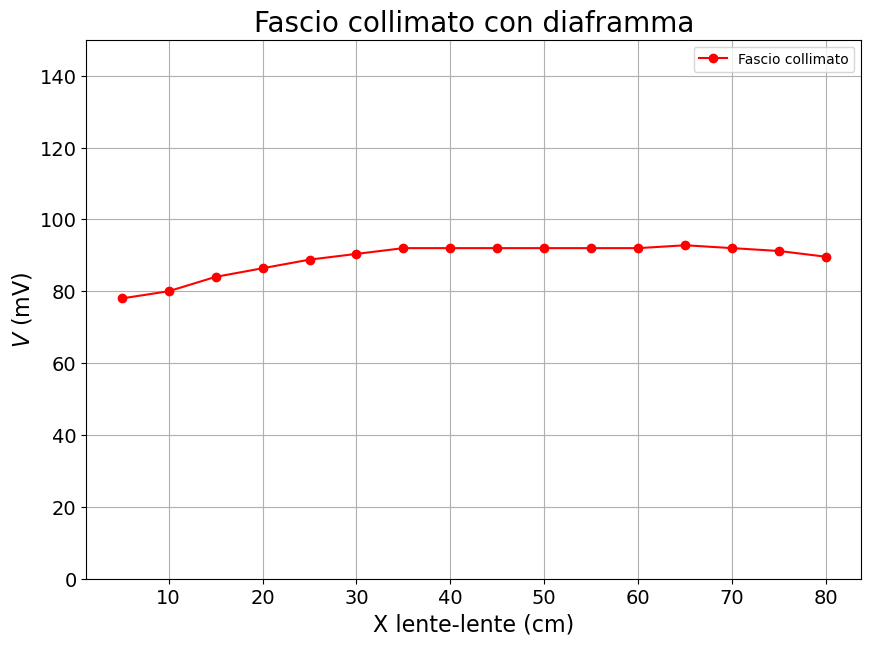

In [112]:
# Con diaframma
# Lettura dati da csv
data = pd.read_csv(rad + "data/2lens_diaframma.csv")
headers = data.keys()

# Creo gli array numpy per l'analisi successiva
x_lens_lens = data['X'].to_numpy()
V = data['V'].to_numpy()

# Fit
fig, ax = plt.subplots(1, 1, figsize=[10,7])

ax.set_title('Fascio collimato con diaframma', size=titlefontsize)
ax.plot(x_lens_lens, V, 'o-', markersize=markersize, color='red', label="Fascio collimato")
ax.set_xlabel('X lente-lente (cm)', size=labelfontsize)
ax.set_ylabel('$V$ (mV)', size=labelfontsize)
ax.set_ylim(0,150)
ax.tick_params(labelsize=tickfontsize)
ax.grid(True)
ax.legend();